# Algorytmy Genetyczne i sztuczne sieci neuronowe

## Budowanie generatora do testowania sieci WTM (ang. SOM (Self-organizing map))

Specyfikacja dotycząca generatora:
<ul>
<li>Liczba grup danych = 5</li>
<li>Rozmiar danych = 2D</li>
<li>Zakres danych [0:100 ; 0:100]</li>
<li>Liczba obiektów w danej grupie danych = 10</li>
<li>Promień każdej grupy = 5</li>
</ul>

Przykładowy wykres wygenerowanych danych poniżej:

<img src="WTM_model_example.png"> 

<font color='red'> UWAGA!!!:</font> Wyświetlanie danych powinno być znormalizowane do zapisu np. [72, 10; ...]. Każda współrzędna kolejna poprzedzona speratorem ,, ; ''

<font color='yellow'> PS: Mieszanie danych podczas uczenia np. w przypadku alfabetu uczenie (a,b,c,d,...), potem uczenie od (g,h,i,j,...). Różne  możliwości????</font>

### Importowanie potrzebnych bibliotek

In [179]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
import math
import csv

### Zmienne potrzebne do wygenerowania danych
<ul>
<li>number_of_groups - mienna określająca ilość grup danych</li>
<li>radius  - zmienna określająca promień okręgu, który posłużyć ma nam jako obszar generowanych obiektów danych</li>
<li>number_of_object - zmienna mówiąca o ilości obiektów jakie muszą być wygenerowane w określonej grupie danych </li>
</ul>

In [180]:
number_of_groups = 10    #Number of groups in model
radius = 5              #Circle radius
number_of_object = 10   #Number of object in each group

### Proces generowania koordynatów dla konkretnych grup
- za pomocą funkcji <font color='yellow'>,,zeros"</font> zawartej w bibliotece numpy generowana jest tablica 2D wypełniona zerami, która potem będzie wykorzystana do zapisu koordynatów poszczególnych wygenerowanych grup,
- funkcja <font color='yellow'>,,coordinate_generator_group(lst_groups)"</font> przekazuje w argumencie stworzoną wcześniej tablice 2D wypełnioną zerami. Następnie poprzez pętle for przechodzimy po poszczególnych elementach tablicy zapisując w niej wygenerowane punkty x i y w odpowiednim zakresie od 0 do 100. Zapis danych jest poprzez <font color='yellow'>,,element[0] & element[1]"</font>, które zapisują koordynaty w konkretnych miejscach podtablicy.
- wykorzystując bibliotekę pandas jesteśmy w stanie zapisać dane x i y w dwuwymiarowej strukturze danych, które oznaczone są rzędami i kolumnami. Pełni to funkcję przejrzystego wglądu do generowanych danych.

In [181]:
def coordinate_generator_group(temp_lst):
    for element in temp_lst:
        temp_x_point = random.randint(0,100)    #Generate x and y coordinate for specific group
        temp_y_point = random.randint(0,100)    
        element[0] = temp_x_point               #Save points in list
        element[1] = temp_y_point

In [182]:
lst_groups = np.zeros((number_of_groups,2))    #Create a list of groups coordinates

coordinate_generator_group(lst_groups)    #Function to generate coordinates for groups

groups = pd.DataFrame(lst_groups, columns =['x', 'y'])        #Load data groups in DataFrame object
print(groups)

      x     y
0  32.0  48.0
1  80.0  14.0
2  86.0  33.0
3   6.0  91.0
4  39.0  14.0
5  88.0  50.0
6  52.0  59.0
7  69.0  16.0
8  36.0  22.0
9  16.0   8.0


### Proces generowania koordynatów do obiektów konkretnych grup danych
- za pomocą wcześniej wspomnianej funkcji <font color=yellow>,,zeros"</font> generowana jest tablica 2D wypełniona zerami,
- wspomniana wyżej tablica nadpisywana jest poprzez wywołaną funkcję <font color=yellow>,,coordinate_generator_object(lst_objects)"</font>. W funkcji na początku został stworzony <font color=yellow>counter</font>, który pomoże podczas identyfkacji danego elementu w tablicy <font color=yellow>temp_lst</font>, która zawiera <font color=yellow>number_of_object*number_of_groups</font> elemenetów. Pierwszy człon pętli iteruje po elementach tablicy zawierającej koordynaty grup, następny człon natomiast będzie generował ilość punktów w grupie zdefiniowanej w zmiennej <font color=yellow>number_of_object</font>. Następnie przy pomocy wzorów na ogrąg generowane są punkty pod konkretnym kątem w okręgu, który jest grupą oraz zapisywane są w zmiennych <font color=yellow>temp_x</font> oraz <font color=yellow>temp_y</font>. Wygenerowane wcześniej koordynaty umieszczane są w konkretnych elementach tablicy jaki wskazuje nam zmienna <font color=yellow>coutner</font>. Na koniec zwracana jest tablica wraz z zapisanymi koordynatami.
- rownież z wykorzystaniem biblioteki pandas jesteśmy w sposób przejrzysty wyświetlić oraz manipulować danaymi.

In [183]:
def coordinate_generator_object(temp_lst):
    counter = 0                                                     #counter elements in array temp_lst
    for elements_lst_groups in lst_groups:
        for _ in range(number_of_object):
            r = radius * random.random()
            theta = 2 * math.pi *random.random()

            temp_x = elements_lst_groups[0] + r * math.cos(theta)   #Generate x and y coordinate for specific group
            temp_y = elements_lst_groups[1] + r * math.sin(theta)

            #print('x', temp_x, 'y', temp_y)
            temp_lst[counter][0] = temp_x
            temp_lst[counter][1] = temp_y
            counter+=1
    
    return temp_lst

In [184]:
lst_objects = np.zeros((number_of_object*number_of_groups, 2))     #list of object which contain x, y coordinate

lst_objects = coordinate_generator_object(lst_objects)

objects = pd.DataFrame(lst_objects, columns =['x', 'y'])        #Load data groups in DataFrame object
print(objects)

            x          y
0   29.254474  45.016569
1   31.953916  44.367767
2   31.500875  44.559562
3   31.403806  50.558723
4   32.876976  48.540401
..        ...        ...
95  13.565500   4.541782
96  15.966534   7.874254
97  16.172570   7.968936
98  18.608763  10.536533
99  17.072063  12.432909

[100 rows x 2 columns]


### Proces wyświetlania wygenerowanych danych na diagramie z użyciem biblioteki matplotlib
- Funkcja <font color=yellow>createCircles(item, radius)</font>, do której przekazywane są konkretne koordynaty wygenerowanych grup danych oraz promień koła wykorzystywane są do określenia środka oraz promienia rysowanego okręgu. 

In [185]:
def  createCircles(centre, radius):
    return plt.Circle((centre[0], centre[1]), radius, color='b', fill=False)

10


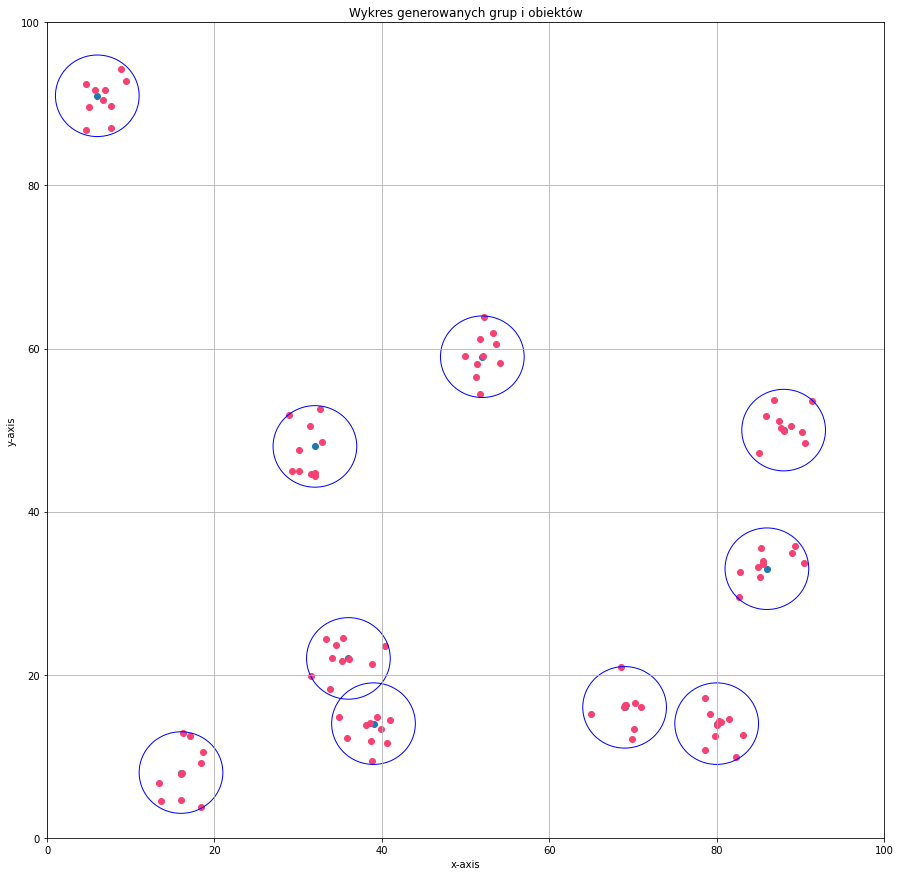

In [186]:
# Creating a new figure 
fig, ax = plt.subplots(figsize=(15,15))

# Numpy array as scatter plot
plt.scatter(x=groups['x'],y=groups['y'])
plt.scatter(x=objects['x'],y=objects['y'], color= '#f54272')

print(len(lst_groups))

for item in lst_groups:
    ax.add_patch(createCircles(item, radius))

# Adding details to the plot
plt.title('Wykres generowanych grup i obiektów')
plt.xlabel('x-axis')
plt.ylabel('y-axis')

# Displaying the plot
plt.xlim(0,100)
plt.ylim(0,100)
plt.grid()
plt.show()

### Zapisywanie danych do pliku w celu wczytania go w programie Kohenen
Mean quantization error = 9.9677, topographic error = 0.96364

In [187]:
with open('data_10_temp.dat', 'w', newline='') as f:
    csv.writer(f, delimiter=' ').writerows(lst_groups)
    csv.writer(f, delimiter=' ').writerows(lst_objects)

## Teoria sieci oraz analiza danych wprowadzonych w programie Kohenen

### Neuronowa sieć Kohenena
Jest najbardziej znaną i do tego wykorzystywaną siecią samouczącą się, która realizuje zasadę samoorganizacji (SOM). Jest to także najbardziej znany przykład sieci konkurencyjnej wykorzystującej koncepcję sąsiedztwa. W wyniku uczenia powstaje mapa topologiczna, której aprioryczna interpretacja jest niemożliwa, ponieważ sieć uczy się bez nauczyciela oraz użytkownik nie jest w stanie kontrolować tego, co się robi. Natomiast po uczeniu jesteśmy w stanie ustalić jakie poszczególne rejony mapy majją znaczenie na podstawie analizy danych wejściowych. Poniższy rysunek przedstawia strukturę sieci Kohonena, gdzie ma on nakreślić koncepcyjną strukturę schematu, bowiem rzeczywiste sieci Kohonena cechują się tym, że działają w wielowymiarowych przestrzeniach danych wejściowych, w związku z czym warstwa wejściowa zawiere bardzo wiele neuronów (skojarzonych z wieloma sygnałami wejściowymi). Typowa warstwa topologiczna zawiera również bardzo wiele neuronów, dzięki czemu sieć po nauczeniu może prezentować bardzo subtelnie rozróżnienia i klasyfikacje dancyh wejściowych.

<img src="screeny/Kohonen_network_schema.png"> 

### Konkurencyjna sieć neuronowa

W niektórych sieciach neuronowych wśród neuronów warstwy wyjściowej lub mapy topologicznej wprowadza mechanizm konkurencji, polegający na tym, że sygnały wyjściowe tych neuronów porównuje się ze sobą. Po podaniu określonego sygnału wyjściowego do sieci - na jej wyjściu otrzymuje się sygnały o różnych wartościach pochodzące od różnych neuronów warstwy wyjściowej lub warstwy topologicznej. Wśród tych sygnałów odnajduje się ten, który ma największą wartość i ten neuron zostaje wskazany jako zwycięzca (patrz rysunek). Z faktu, że określony neuron został uznany za zwycięzcę, wynikają różne konsekwencje. W szczególności w niektórych sieciach na etapie uczenia zmiany wag dotyczą wyłącznie zwycięzcy oraz (niekiedy) jego sąsiedztwa. W sieciach klasyfikacyjnych zwycięski neuron wskazuje poprawną kategoryzację sygnału wejściowego lub poprawne rozpoznanie obiektu reprezentowanego przez ten sygnał.

<img src="screeny/concept_winner.png"> 

### Korekcja błędu
Zmiana wartości parametrów sieci (najczęściej wag) mająca na celu zmniejszenie błędu popełnianego przez sieć. Ponieważ błąd wyznaczany jest podczas jednego kroku procesu uczenia, przeto korekta błędu nie może być zbyt radykalna, bo łatwo jest doprowadzić do sytuacji, w której zmiana parametrów wynikająca z pokazania jednego przypadku uczącego ze zbioru uczącego może popsuć wartości parametrów ustalone wcześniej dla innych przypadków uczących. W praktyce wielkość korekty błędu determinuje współczynnik uczenia. Przebieg typowej korekty błędu przedstawia poniższy schemat.

<img src="screeny/corection_fault.png"> 

### Mapa topologiczna
W sieci Kohonena ta warstwa, na której prezentowany jest wynik działania sieci, nazywana jest warstwą topologiczną. Neurony należące do tej warstwy specjalizują się w identyfikowaniu poszczególnych obiektów, jakie w trakcie procesu samouczenia były sieci prezentowane na jej wejściu. Każdy neuron warstwy topologicznej ma więc przypisany do siebie obiekt, którego pojawienie się na wejściu sieci powoduje, że ten właśnie neuron zostaje
zwycięzcą (patrz hasło Konkurencyjna sieć neuronowa). Rozmieszczenie tych obiektów formuje właśnie mapę topologiczną, pokazaną symbolicznie na rysunku. Znajomość mapy topologicznej ułatwia użytkownikowi interpretację i wykorzystanie wyników obliczeń dostarczanych przez sieć Kohonena.

<img src="screeny/topology_map.png"> 

### Przykłady algorytmów
#### WTA (Winner take all)
Algorytm WTA (Winner Takes All) to jeden z podstawowych algorytmów stosowanych w sieciach neuronowych typu Kohonena, które służą do grupowania danych wejściowych na podstawie podobieństwa. Algorytm ten wykorzystuje konkurencyjną regułę uczenia, która pozwala na wyłonienie zwycięzcy w procesie klasyfikacji.

Algorytm WTA składa się z trzech etapów:

1. Inicjalizacja - losowo inicjuje się położenie neuronów w przestrzeni wejściowej i przypisuje im losowe wagi.
2. Konkurencja - neuron, który jest najbliżej aktualnie prezentowanego wektora wejściowego jest uznawany za zwycięzcę. To właśnie on jest aktywowany, a jego wagi są modyfikowane w kierunku wektora wejściowego. Wagi pozostałych neuronów pozostają niezmienione. Ten etap może być powtarzany wielokrotnie dla różnych wektorów wejściowych.
3. Stabilizacja - po zakończeniu procesu konkurencji, sieć ulega stabilizacji. Wagi neuronów nie są już modyfikowane, a każdy neuron jest przypisany do jednej z grup.

Algorytm WTA wykorzystuje zasadę zwycięzcy zabierającego wszystko - to znaczy, że zwycięzca zabiera całą pulę i jest jedynym neuronem, który jest aktywowany w trakcie prezentacji danego wektora wejściowego. Dzięki temu algorytm WTA umożliwia wyłonienie dominującego wzorca wśród danych wejściowych i grupowanie ich w klastry.

Algorytm WTA znajduje zastosowanie w rozpoznawaniu wzorców, analizie danych, analizie obrazów oraz klasteryzacji danych. Jego zaletami są prostota, szybkość i skuteczność. Jednakże, algorytm WTA ma również pewne wady, takie jak niestabilność w przypadku wystąpienia szumów lub zmian w danych wejściowych, a także niemożność rozpoznawania złożonych wzorców.

##### Wykresy dla określonych parametrów

liczba grup = 5 <br>
liczba obiektów = 10 <br> 
liczba epok = 10 <br>
wartość początkowa uczenia = 0.5 <br>

<img src="screeny\WTA\WTA_5_object\WTA_learning_process.jpg"> 
<img src="screeny\WTA\WTA_5_object\WTA_Graph.jpg">
<img src="screeny\WTA\WTA_5_object\WTA_Areas.jpg">

liczba grup = 10 <br>
liczba obiektów = 10 <br>
liczba epok = 10 <br>
wartość początkowa uczenia = 0.5 <br>

<img src="screeny\WTA\WTA_10_object\WTA_learning_process.jpg">
<img src="screeny\WTA\WTA_10_object\WTA_Graph.jpg">
<img src="screeny\WTA\WTA_10_object\WTA_Areas.jpg">

#### CWTA (Conscience Winner Takes All)
lgorytm CWTA (Conscience Winner Takes All) to modyfikacja standardowego algorytmu Winner-Takes-All (WTA), stosowanego w sieciach neuronowych typu Kohonena. WTA wybiera zwycięzcę na podstawie minimalnej odległości między wektorem wejściowym a neuronami SOM. WTA nie uwzględnia jednak dodatkowej wiedzy o stanie sieci, co może prowadzić do niedopasowania zwycięzcy.

Algorytm CWTA wprowadza pojęcie "sumy sumień" dla każdego neuronu, która odzwierciedla aktywność neuronu na przestrzeni czasu. Im częściej neuron jest aktywny, tym wyższa jest jego suma sumień. Dzięki temu, że CWTA uwzględnia historię aktywności neuronów, pozwala na wybór bardziej stabilnego zwycięzcy, który jest w stanie lepiej odzwierciedlić strukturę wejściową.

Algorytm CWTA składa się z dwóch faz:

1. Faza konkurencji - każdy neuron SOM jest aktywowany przez wektor wejściowy, a następnie suma sumień każdego neuronu jest zwiększana o wartość procentową.
2. Faza selekcji zwycięzcy - neuron z najniższą wartością sumy sumień jest uznawany za zwycięzcę i jest aktualizowany.

Algorytm CWTA pozwala na uniknięcie efektu "histerii" sieci, gdzie zwycięzca stale wygrywa, a inne neurony są wykluczone. Dzięki uwzględnieniu historii aktywności, algorytm CWTA może przeciwdziałać temu efektowi, wybierając bardziej stabilnych zwycięzców i zapewniając bardziej równomierne rozmieszczenie neuronów SOM w przestrzeni wejściowej.

Algorytm CWTA znajduje zastosowanie w rozpoznawaniu wzorców, klasyfikacji obrazów i analizie danych, gdzie ważna jest stabilność wyboru zwycięzcy i równomierność rozkładu neuronów SOM w przestrzeni wejściowej.

##### Wykresy dla określonych parametrów

liczba grup = 5 <br>
liczba obiektów = 10 <br> 
liczba epok = 10 <br>
wartość początkowa uczenia = 0.5 <br>

<img src="screeny\CWTA\CWTA_5_groups\CWTA_learning_process.jpg">
<img src="screeny\CWTA\CWTA_5_groups\CWTA_Graph.jpg">
<img src="screeny\CWTA\CWTA_5_groups\CWTA_Areas.jpg">

liczba grup = 10 <br>
liczba obiektów = 10 <br>
liczba epok = 10 <br>
wartość początkowa uczenia = 0.5 <br>

<img src="screeny\CWTA\CWTA_10_groups\CWTA_learning_process.jpg">
<img src="screeny\CWTA\CWTA_10_groups\CWTA_Graph.jpg">
<img src="screeny\CWTA\CWTA_10_groups\CWTA_Areas.jpg">

#### WTM batch (Winner Takes Most Batch)

Algorytm WTM Batch (Winner Takes Most Batch) jest stosowany w sieciach neuronowych typu Kohonena, które służą do grupowania danych wejściowych na podstawie podobieństwa. Algorytm ten składa się z dwóch faz: inicjalizacji i konkurencji.

1. Inicjalizacja:
W fazie inicjalizacji losowo wybierane są wagi dla neuronów SOM (Self-Organizing Map). Wagi te są przypisywane początkowemu rozkładowi w przestrzeni wejściowej.

2. Konkurencja:
W fazie konkurencji dla każdego wejścia wyznaczany jest neuron z najbliższą wagą, zwany zwycięzcą. Następnie wagi są aktualizowane, tak aby zwycięzca miał jeszcze bliższe wartości do wejścia, a sąsiednie neurony do zwycięzcy również są aktualizowane, ale w mniejszym stopniu.

Algorytm WTM Batch wykorzystuje strategię zwycięzca-bierze-więcej (winner-takes-most), co oznacza, że wybrany neuron otrzymuje większą aktualizację swoich wag, a sąsiednie neurony są aktualizowane w mniejszym stopniu. Dzięki temu algorytm może szybciej osiągać stabilizację i lepiej radzić sobie z dużymi zbiorami danych.

Algorytm WTM Batch jest stosowany w przetwarzaniu obrazów i dźwięku, gdzie sieci Kohonena służą do grupowania pikseli lub cech dźwiękowych w zbiory o podobnych właściwościach.

##### Wykresy dla określonych parametrów

liczba grup = 5 <br>
liczba obiektów = 10 <br> 
liczba epok = 10 <br>
wartość początkowa uczenia = 0.2 <br>
promień początkowy = 3 <br>

<img src="screeny\WTM_batch\WTM_batch_5_groups\WTM_batch_learning_process.jpg">
<img src="screeny\WTM_batch\WTM_batch_5_groups\WTM_batch_Graph.jpg">
<img src="screeny\WTM_batch\WTM_batch_5_groups\WTM_batch_Areas.jpg">

liczba grup = 10 <br>
liczba obiektów = 10 <br>
liczba epok = 10 <br>
wartość początkowa uczenia = 0.2 <br>
promień początkowy = 3 <br>

<img src="screeny\WTM_batch\WTM_batch_10_groups\WTM_batch_learning_process.jpg">
<img src="screeny\WTM_batch\WTM_batch_10_groups\WTM_batch_Graph.jpg">
<img src="screeny\WTM_batch\WTM_batch_10_groups\WTM_batch_Areas.jpg">

#### WTM seq
Algorytm WTM Seq (Winner Takes Most Sequence) jest rozszerzeniem algorytmu WTM Batch, również stosowanym w sieciach neuronowych typu Kohonena. W odróżnieniu od WTM Batch, WTM Seq uwzględnia sekwencje danych wejściowych i ma zastosowanie w analizie sekwencji tekstu.

Algorytm WTM Seq składa się z trzech faz:

1. Inicjalizacji - losowo wybierane są wagi dla neuronów SOM.
2. Konkurencji - dla każdej sekwencji wyznaczany jest neuron z najbliższą wagą, zwany zwycięzcą. Wagi są aktualizowane, aby zwycięzca miał jeszcze bliższe wartości do sekwencji, a sąsiednie neurony do zwycięzcy również są aktualizowane, ale w mniejszym stopniu.
3. Adaptacji - po każdej iteracji uczącej wagi są aktualizowane w sposób specyficzny dla sekwencji. Zamiast aktualizować wagi neuronów tylko na podstawie jednej sekwencji, algorytm WTM Seq wykorzystuje wagę neuronu, która zależy od sumy wag zwycięzców dla każdej sekwencji w ciągu uczącym. To znaczy, że sekwencje występujące częściej wpłyną na aktualizację wag w sposób bardziej znaczący.

Algorytm WTM Seq jest stosowany w analizie sekwencji tekstu, na przykład do grupowania dokumentów na podstawie podobieństwa. Może być również stosowany w innych dziedzinach, gdzie występują sekwencje danych wejściowych, takich jak sekwencje DNA lub sygnały czasowe.

##### Wykresy dla określonych parametrów

liczba grup = 5 <br>
liczba obiektów = 10 <br> 
liczba epok = 10 <br>
wartość początkowa uczenia = 0.05 <br>
promień początkowy = 4 <br>

<img src="screeny\WTM_seq\WTM_seq_5_groups\WTM_seq_learning_process.jpg">
<img src="screeny\WTM_seq\WTM_seq_5_groups\WTM_seq_Graph.jpg">
<img src="screeny\WTM_seq\WTM_seq_5_groups\WTM_seq_Areas.jpg">

liczba grup = 10 <br>
liczba obiektów = 10 <br>
liczba epok = 10 <br>
wartość początkowa uczenia = 0.05 <br>
promień początkowy = 4 <br>

<img src="screeny\WTM_seq\WTM_seq_10_groups\WTM_seq_learning_process.jpg">
<img src="screeny\WTM_seq\WTM_seq_10_groups\WTM_seq_Graph.jpg">
<img src="screeny\WTM_seq\WTM_seq_10_groups\WTM_seq_Areas.jpg">

#### Neural gas
Algorytm Neural Gas (NG) jest jednym z algorytmów stosowanych w sieciach neuronowych typu Kohonena, które służą do grupowania danych wejściowych na podstawie podobieństwa. Algorytm ten jest rozszerzeniem algorytmu Kohonena i wykorzystuje podobne założenia co WTM (Winner-Takes-Most).

Algorytm NG składa się z trzech etapów:

1. Inicjalizacja - losowo inicjuje się położenie neuronów w przestrzeni wejściowej i przypisuje im losowe wagi.
2. Adaptacja - neuron, który jest najbliżej aktualnie prezentowanego wektora wejściowego jest uaktualniany poprzez zmianę swojej pozycji oraz wagi. Sąsiedzi tego neuronu również są uaktualniani, ale w mniejszym stopniu. Proces ten jest powtarzany wielokrotnie aż do osiągnięcia stabilizacji.
3. Redukcja - usuwanie neuronów, które są mniej aktywne i nie przyczyniają się do zdefiniowania skutecznych klastrów.

Algorytm NG różni się od standardowej sieci Kohonena tym, że bada on dystrybucję punktów w przestrzeni wejściowej, a nie odległość euklidesową między neuronami. W wyniku tego algorytm NG umożliwia bardziej równomierne rozmieszczenie neuronów w przestrzeni wejściowej oraz lepsze przewidywanie topologii rozkładu klastrów.

Algorytm Neural Gas znajduje zastosowanie w rozpoznawaniu wzorców, analizie danych, analizie obrazów oraz klasteryzacji danych.

##### Wykresy dla określonych parametrów

liczba grup = 5 <br>
liczba obiektów = 10 <br> 
liczba epok = 10 <br>
wartość początkowa uczenia = 0.5 <br>
lambda początkowa = 18 <br>

<img src="screeny\NeuralGas\Neural_gasp_5_groups\Neural_gasp_learning_process.jpg">
<img src="screeny\NeuralGas\Neural_gasp_5_groups\Neural_gasp_Graph.jpg">
<img src="screeny\NeuralGas\Neural_gasp_5_groups\Neural_gasp_Areas.jpg">

liczba grup = 10 <br>
liczba obiektów = 10 <br>
liczba epok = 10 <br>
wartość początkowa uczenia = 0.5 <br>
lambda początkowa = 18 <br>

<img src="screeny\NeuralGas\Neural_gasp_10_groups\Neural_gasp_learning_process.jpg">
<img src="screeny\NeuralGas\Neural_gasp_10_groups\Neural_gasp_Graph.jpg">
<img src="screeny\NeuralGas\Neural_gasp_10_groups\Neural_gasp_Areas.jpg">

### Podsumowanie oraz wnioski
Podsumowując, algorytmy w sieciach neuronowych typu Kohonena służą do grupowania danych wejściowych w klastry. Wyróżniamy kilka algorytmów, takich jak WTA, CWTA, Neural Gas oraz WTM batch i WTM seq, które różnią się między sobą sposobem wyłaniania zwycięzców i modyfikacji wag neuronów. <br>

Niezbędnym elementem w sieciach Kohonena jest proces kwantyzacji, czyli przypisywania wektorów wejściowych do najbliższego neuronu. Jednakże, ten proces może wprowadzić błąd kwantyzacji, co z kolei może prowadzić do destabilizacji sieci i utraty jakości grupowania.

W algorytmie WTA, błąd kwantyzacji jest duży wynika z faktu, że wyłoniony zwycięzca reprezentuje tylko jeden klaster, co może prowadzić do nieprawidłowego grupowania danych wejściowych, szczególnie w przypadku wystąpienia szumów lub zmian w danych.

W algorytmie CWTA, błąd kwantyzacji jest mniejszy, ponieważ mechanizm sumy sumień umożliwia zapobieganie powstawaniu klastrów o niskiej jakości. Niemniej jednak, nadal istnieje ryzyko nieprawidłowego grupowania danych wejściowych.

W algorytmie Neural Gas, błąd kwantyzacji jest redukowany poprzez rozproszenie neuronów w przestrzeni wejściowej, co umożliwia dokładniejsze odwzorowanie danych i wyłonienie mniejszych, bardziej precyzyjnych klastrów.

W algorytmach WTM batch oraz WTM seq, błąd kwantyzacji jest mniejszy niż w algorytmie WTA, ponieważ umożliwiają wyłonienie kilku zwycięzców dla danego wektora wejściowego. To pozwala na zredukowanie ryzyka nieprawidłowego grupowania danych i zwiększenie stabilności sieci.

Wnioskiem z powyższego jest to, że błąd kwantyzacji jest kluczowym problemem w sieciach neuronowych typu Kohonena, a wybór odpowiedniego algorytmu zależy od specyfiki problemu, rodzaju danych wejściowych oraz wymagań dotyczących stabilności i jakości grupowania.